Сперва преобразуем формат данных файла groceries.csv 

In [ ]:
import csv

with open('groceries.csv', newline='', encoding='utf-8') as infile:
    reader = csv.reader(infile)
    data = list(reader)

max_len = max(len([item.strip() for item in row if item.strip() != '']) for row in data)

header = ['Item(s)'] + [f'Item {i+1}' for i in range(max_len)]

transformed_data = [header]

for row in data:
    products = [item.strip() for item in row if item.strip() != '']
    count = len(products)
    new_row = [count] + products
    # Дополнение пустыми ячейками до длины заголовка
    new_row.extend([''] * (len(header) - len(new_row)))
    transformed_data.append(new_row)

with open('groceries_transformed.csv', 'w', newline='', encoding='utf-8') as outfile:
    writer = csv.writer(outfile)
    writer.writerows(transformed_data)

[['Item(s)', 'Item 1', 'Item 2', 'Item 3', 'Item 4', 'Item 5', 'Item 6', 'Item 7', 'Item 8', 'Item 9', 'Item 10', 'Item 11', 'Item 12', 'Item 13', 'Item 14', 'Item 15', 'Item 16', 'Item 17', 'Item 18', 'Item 19', 'Item 20', 'Item 21', 'Item 22', 'Item 23', 'Item 24', 'Item 25', 'Item 26', 'Item 27', 'Item 28', 'Item 29', 'Item 30', 'Item 31', 'Item 32'], [4, 'citrus fruit', 'semi-finished bread', 'margarine', 'ready soups', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', ''], [3, 'tropical fruit', 'yogurt', 'coffee', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', ''], [1, 'whole milk', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', ''], [4, 'pip fruit', 'yogurt', 'cream cheese', 'meat spreads', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', ''

   Item(s)            Item 1               Item 2          Item 3  \
0        4      citrus fruit  semi-finished bread       margarine   
1        3    tropical fruit               yogurt          coffee   
2        1        whole milk                  NaN             NaN   
3        4         pip fruit               yogurt    cream cheese   
4        4  other vegetables           whole milk  condensed milk   

                     Item 4 Item 5 Item 6 Item 7 Item 8 Item 9  ... Item 23  \
0               ready soups    NaN    NaN    NaN    NaN    NaN  ...     NaN   
1                       NaN    NaN    NaN    NaN    NaN    NaN  ...     NaN   
2                       NaN    NaN    NaN    NaN    NaN    NaN  ...     NaN   
3              meat spreads    NaN    NaN    NaN    NaN    NaN  ...     NaN   
4  long life bakery product    NaN    NaN    NaN    NaN    NaN  ...     NaN   

  Item 24 Item 25 Item 26 Item 27 Item 28 Item 29 Item 30 Item 31 Item 32  
0     NaN     NaN     NaN     NaN 

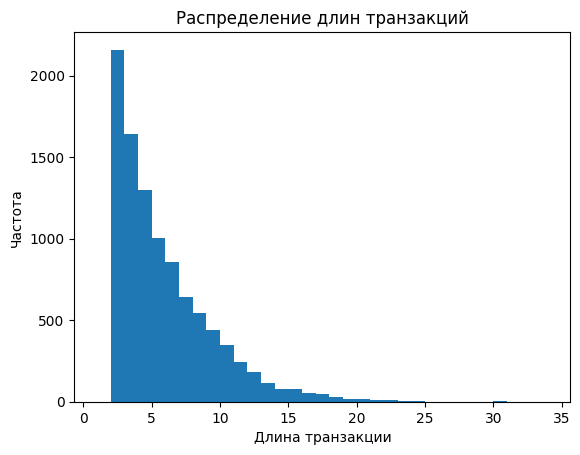

Уникальных товаров: 169


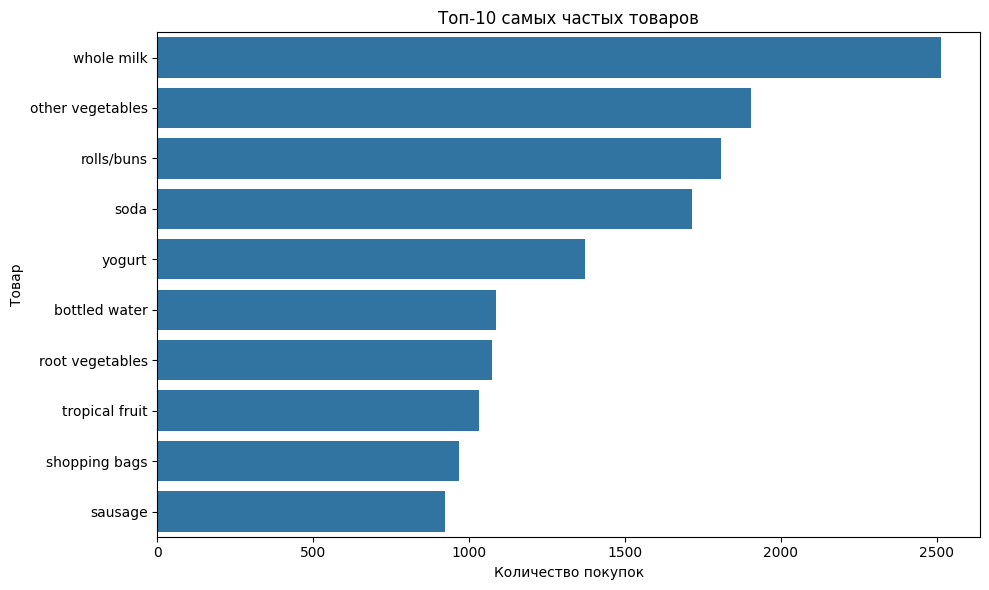

In [5]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from collections import Counter
from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import apriori, association_rules, fpgrowth
import networkx as nx

#Загрузка данных
all_data = pd.read_csv('groceries_transformed.csv')
print(all_data.head())

#Анализ транзакций
transaction_lengths = all_data.notnull().sum(axis=1)
plt.hist(transaction_lengths, bins=range(1, max(transaction_lengths) + 2))
plt.xlabel('Длина транзакции')
plt.ylabel('Частота')
plt.title('Распределение длин транзакций')
plt.show()

#Очистка данных
np_data = all_data.to_numpy()
np_data = [[elem for elem in row[1:] if isinstance(elem,str)] for row in np_data]

#Список уникальных товаров
unique_items = set()
for row in np_data:
    for elem in row:
        unique_items.add(elem)
print(f"Уникальных товаров: {len(unique_items)}")

te = TransactionEncoder()
te_ary = te.fit(np_data).transform(np_data)
data = pd.DataFrame(te_ary, columns=te.columns_)

all_items = [item for row in np_data for item in row]
item_counts = Counter(all_items)
top_items = item_counts.most_common(10)
items, counts = zip(*top_items)

plt.figure(figsize=(10, 6))
sns.barplot(x=list(counts), y=list(items))
plt.title('Топ-10 самых частых товаров')
plt.xlabel('Количество покупок')
plt.ylabel('Товар')
plt.tight_layout()
plt.show()



In [24]:
df1 = apriori(data, min_support=0.02, use_colnames = True)
df1 = df1.sort_values(by='support', ascending=False)
print("Частые наборы")
print(df1)
rules = association_rules(df1, metric = "confidence", min_threshold = 0.13)
print(f"Количество найденных правил с достоверностью 0.13: {len(rules)}")
print(rules[['antecedents', 'consequents', 'support', 'confidence', 'lift']])


Частые наборы
     support                         itemsets
57  0.255516                     (whole milk)
39  0.193493               (other vegetables)
43  0.183935                     (rolls/buns)
49  0.174377                           (soda)
58  0.139502                         (yogurt)
..       ...                              ...
75  0.020539        (whole milk, frankfurter)
60  0.020437       (bottled beer, whole milk)
76  0.020437  (whole milk, frozen vegetables)
96  0.020437      (pip fruit, tropical fruit)
67  0.020031       (other vegetables, butter)

[122 rows x 2 columns]
Количество найденных правил с достоверностью 0.13: 103
             antecedents         consequents   support  confidence      lift
0     (other vegetables)        (whole milk)  0.074835    0.386758  1.513634
1           (whole milk)  (other vegetables)  0.074835    0.292877  1.513634
2           (whole milk)        (rolls/buns)  0.056634    0.221647  1.205032
3           (rolls/buns)        (whole milk)  0

Согласно результатам анализа частых наборов, самый востребованный товар — это цельное молоко (whole milk), которое составляет 25.6% всех транзакций. Наименее популярным сочетанием оказалось "овощи" и "масло" (other vegetables, butter), поддержка которого равна 0.02.

Применение алгоритма с заданной по варианту достоверностью позволило выявить 103 ассоциативных правила.

In [25]:
rules_lift = rules.sort_values(by='lift', ascending=False)
print("Правила с высоким lift (топ-10):")
print(rules_lift[['antecedents', 'consequents', 'support', 'confidence', 'lift']].head(10))

rules_conf = rules.sort_values(by='confidence', ascending=False)
print("\nПравила с высокой confidence (топ-10):")
print(rules_conf[['antecedents', 'consequents', 'support', 'confidence', 'lift']].head(10))

Правила с высоким lift (топ-10):
                        antecedents                     consequents   support  \
75                (root vegetables)  (other vegetables, whole milk)  0.023183   
72   (other vegetables, whole milk)               (root vegetables)  0.023183   
101                (tropical fruit)                     (pip fruit)  0.020437   
100                     (pip fruit)                (tropical fruit)  0.020437   
74    (whole milk, root vegetables)              (other vegetables)  0.023183   
8                (other vegetables)               (root vegetables)  0.047382   
9                 (root vegetables)              (other vegetables)  0.047382   
82                         (yogurt)  (other vegetables, whole milk)  0.022267   
80   (other vegetables, whole milk)                        (yogurt)  0.022267   
42             (whipped/sour cream)              (other vegetables)  0.028876   

     confidence      lift  
75     0.212687  2.842082  
72     0.309783  2.

Наиболее значимые полезные правила:
1. (root vegetables) → (other vegetables, whole milk)

- Lift = 2.84 (самый высокий)

- Support = 2.3%

- Confidence = 21.3%

Покупатели корнеплодов с очень высокой вероятностью также покупают другие овощи и молоко

2. (tropical fruit) ↔ (pip fruit) (взаимная связь)

- Lift = 2.57

- Support = 2.0%

- Confidence = 19.5-27.0%

Сильная взаимосвязь между тропическими и косточковыми фруктами

3. (whole milk, root vegetables) → (other vegetables)

- Lift = 2.45

- Confidence = 47.4%

Комбинация молока и корнеплодов сильно предсказывает покупку других овощей

4. Тривиальные правила: Правила с whole milk как консеквентом:

(butter) → (whole milk): Lift = 1.95, Confidence = 49.7%

(curd) → (whole milk): Lift = 1.92, Confidence = 49.0%

(domestic eggs) → (whole milk): Lift = 1.85, Confidence = 47.3%

Проблема: Молоко - базовый товар, который часто покупается со многими другими продуктами

Правила с умеренным Lift (< 2.0) но высокой Confidence:

Все правила с Confidence > 45% но Lift < 2.0 можно считать тривиальными

Они отражают общие паттерны покупок, а не специфические взаимосвязи

1. Наиболее ценными являются правила с:
Lift > 2.2 - значимая прогностическая сила

Support > 2% - практическая значимость

Confidence 20-40% - баланс между надежностью и специфичностью

2. 3 самых полезных правила:

Овощные комбинации: корнеплоды → другие овощи + молоко

Фруктовые пары: тропические ↔ косточковые фрукты

Молочные комплексы: йогурт + овощи → молоко

Оценка влияния параметров алгоритма на получаемые правила (на количество правил и метрики). <br>
Значения support: 0.01, 0.02, 0.03 <br>
Значения confidence: 0.2, 0.25, 0.3 <br>

   support  confidence  num_rules  avg_confidence  avg_lift
0     0.01        0.25        170        0.370332  1.874660
1     0.01        0.35         89        0.437193  1.937262
2     0.01        0.40         62        0.464345  1.993455
3     0.02        0.25         49        0.362910  1.723817
4     0.02        0.35         26        0.418250  1.771844
5     0.02        0.40         15        0.448026  1.863106
6     0.03        0.25         15        0.370359  1.598017
7     0.03        0.35          9        0.407180  1.654151
8     0.03        0.40          5        0.427549  1.782344


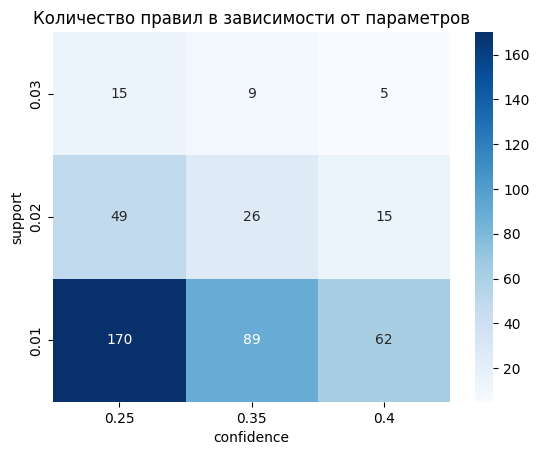

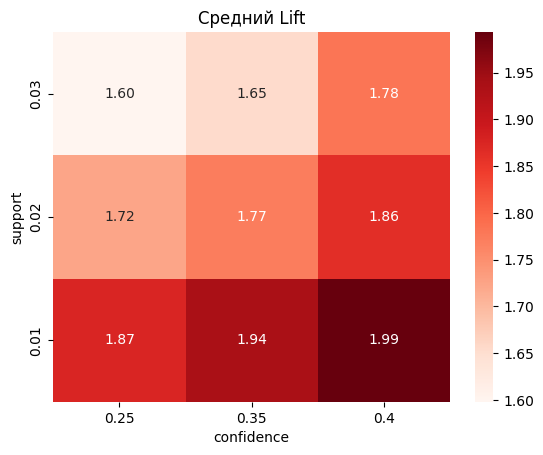

In [ ]:
results = []
supports = [0.01, 0.02, 0.03]
confidences = [0.25, 0.35, 0.4]

for sup in supports:
    for conf in confidences:
        freq_items = apriori(data, min_support=sup, use_colnames=True)
        rule_set = association_rules(freq_items, metric="confidence", min_threshold=conf)

        num_rules = len(rule_set)
        avg_confidence = rule_set['confidence'].mean() if num_rules > 0 else 0
        avg_lift = rule_set['lift'].mean() if num_rules > 0 else 0
        useful_rules = len(rule_set[rule_set['lift'] > 1])

        results.append({
            'support': sup,
            'confidence': conf,
            'num_rules': num_rules,
            'avg_confidence': avg_confidence,
            'avg_lift': avg_lift,
        })

results_df = pd.DataFrame(results)
print(results_df)


import seaborn as sns
import matplotlib.pyplot as plt

pivot_table = results_df.pivot(index='support', columns='confidence', 
                               values='num_rules').sort_index(ascending=False)
sns.heatmap(pivot_table, annot=True, fmt='.0f', cmap="Blues")
plt.title('Количество правил в зависимости от параметров')
plt.show()

pivot_lift = results_df.pivot(index='support', columns='confidence', 
                              values='avg_lift').sort_index(ascending=False)
sns.heatmap(pivot_lift, annot=True, fmt='.2f', cmap="Reds")
plt.title('Средний Lift')
plt.show()